In [2]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
!cp /content/drive/Shareddrives/ML_PROJET2/Project_2/helpers.py /content
!cp /content/drive/Shareddrives/ML_PROJET2/Project_2/utils.py /content
!cp /content/drive/Shareddrives/ML_PROJET2/Project_2/models.py /content

Mounted at /content/drive


In [5]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.2 MB/s eta 0:00:00


# **Building and testing different U-Net models**

In [6]:
import numpy as np
import tensorflow as tf
import keras_tuner as kt
import tensorflow.keras as keras
import matplotlib.pyplot as plt


from utils import *
from helpers import *
from models import *

## **Loading the training data**

In [7]:
# Loaded a set of images
root_dir = "/content/drive/Shareddrives/ML_PROJET2/Project_2/data/training/"
image_dir = root_dir + "images/"
gt_dir = root_dir + "groundtruth/"

imgs = extract_data_for_unet(image_dir, 100)
gt_imgs = extract_labels_for_unet(gt_dir, 100)

Loaded 100 images.
Loaded 100 groundtruth images.
Shape of GT images :  (100, 400, 400)


In [4]:
x_tr, x_te, y_tr, y_te = split_data(imgs, gt_imgs, 0.85)

NameError: ignored

## **1st model : U-Net 32**
U-net model with 4 stages starting with a filter of size 32. No regularization and 0.5 dropout.

In [ ]:
model32 = build_unet(dropout = 0.5, activation='relu', regularization=0)

In [ ]:
model32.summary()

In [ ]:
model32.compile(optimizer='adam',
                loss=TverskyLoss,
                metrics=['accuracy'])

In [ ]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True),
             tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from32', save_weights_only=True, verbose=1)]

In [ ]:
history_32 = model32.fit(x_tr, y_tr, batch_size=8, epochs=200, validation_data=(x_te, y_te), callbacks=[callbacks])

In [ ]:
train_f1=evaluating_model_f1(x_tr, y_tr, model32)
print("the training f1 score is: ", train_f1)

validate_f1=evaluating_model_f1(x_te, y_te, model32)
print("the validating f1 score is:", validate_f1)

3/3 [==============================] - 1s 131ms/step
the training f1 score is:  0.6604918114367369
1/1 [==============================] - 0s 34ms/step
the validating f1 score is: 0.512475724542065


1/1 [==============================] - 0s 19ms/step


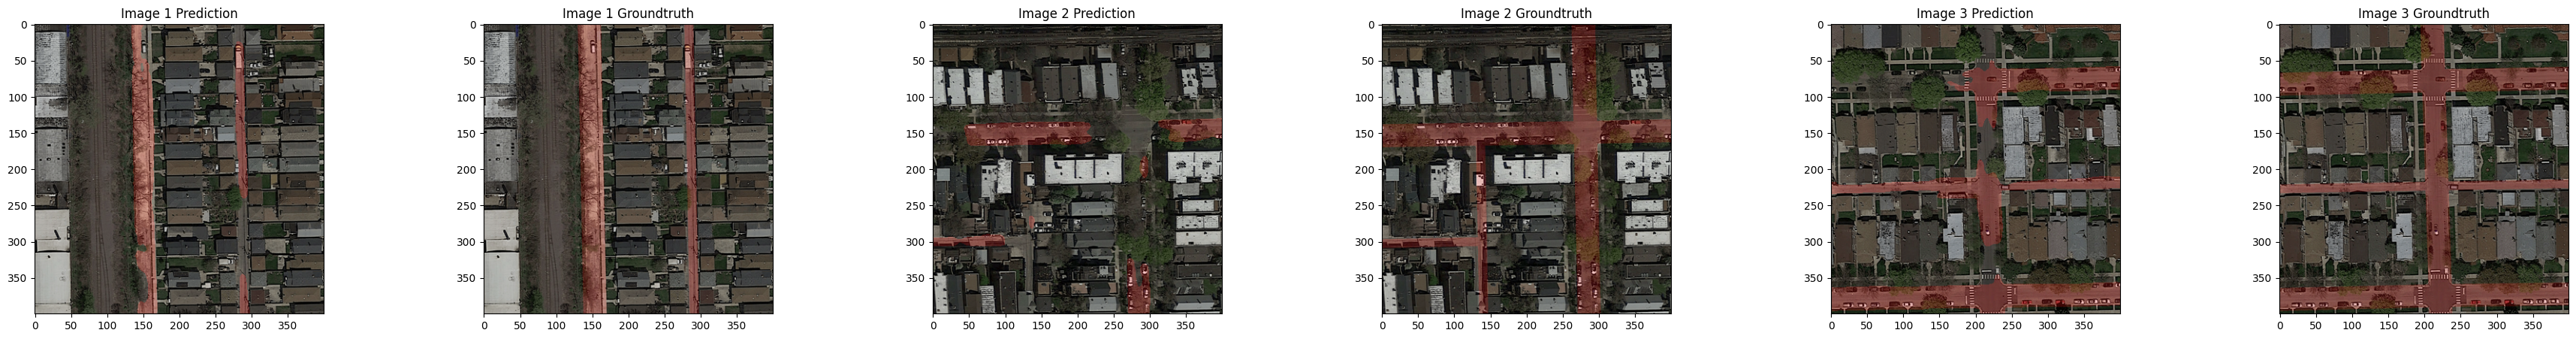

In [ ]:
show_predictions_unet(model32, 3)

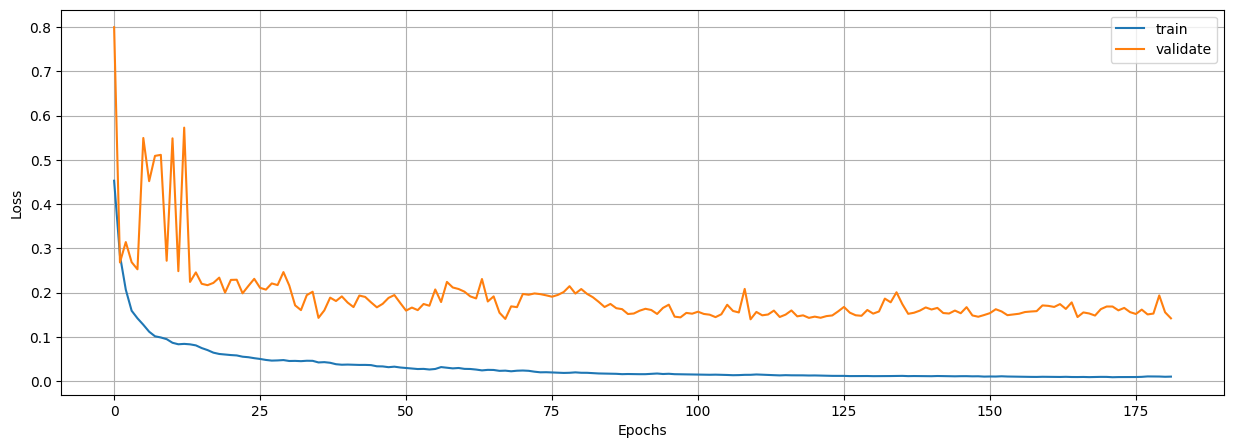

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(history_32.history['loss'])
plt.plot(history_32.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validate'], loc='upper right')
#plt.ylim([0, 1.3])
plt.grid()
plt.show()

In [ ]:
tf.keras.utils.plot_model(model32, show_shapes=True, dpi=64)

## **2nd model : U-Net 32R**
U-net model with 4 stages starting with a filter of size 32. With L2-regularization and 0.2 dropout.

In [ ]:
model32R = build_unet(dropout = 0.2, activation='relu', regularization=1e-8)
model32R.compile(optimizer='adam',
                loss=TverskyLoss,
                metrics=['accuracy'])
callbacks_32R = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True),
             tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from32R', save_weights_only=True, verbose=1)]
history_32R = model32R.fit(x_tr, y_tr, batch_size=8, epochs=200, validation_data=(x_te, y_te), callbacks=[callbacks_32R])


Epoch 1/200
11/11 [==============================] - ETA: 0s - loss: 0.3851 - accuracy: 0.6365
Epoch 1: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from32R
11/11 [==============================] - 14s 290ms/step - loss: 0.3851 - accuracy: 0.6365 - val_loss: 0.7772 - val_accuracy: 0.2229
Epoch 2/200
11/11 [==============================] - ETA: 0s - loss: 0.2002 - accuracy: 0.8271
Epoch 2: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from32R
11/11 [==============================] - 4s 398ms/step - loss: 0.2002 - accuracy: 0.8271 - val_loss: 0.3794 - val_accuracy: 0.6361
Epoch 3/200
11/11 [==============================] - ETA: 0s - loss: 0.1359 - accuracy: 0.8779
Epoch 3: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from32R
11/11 [==============================] - 3s 257ms/step - loss: 0.1359 - accuracy: 0.8779 - val_loss: 0.2429 - val_accuracy: 0.7577
Epoch 4/200
11/11 [==============================] - E

In [ ]:
train_f1=evaluating_model_f1(x_tr, y_tr, model32R)
print("the training f1 score is: ", train_f1)

validate_f1=evaluating_model_f1(x_te, y_te, model32R)
print("the validating f1 score is:", validate_f1)

3/3 [==============================] - 5s 1s/step
the training f1 score is:  0.9726745707920782
1/1 [==============================] - 1s 1s/step
the validating f1 score is: 0.7526468126842321


1/1 [==============================] - 0s 20ms/step


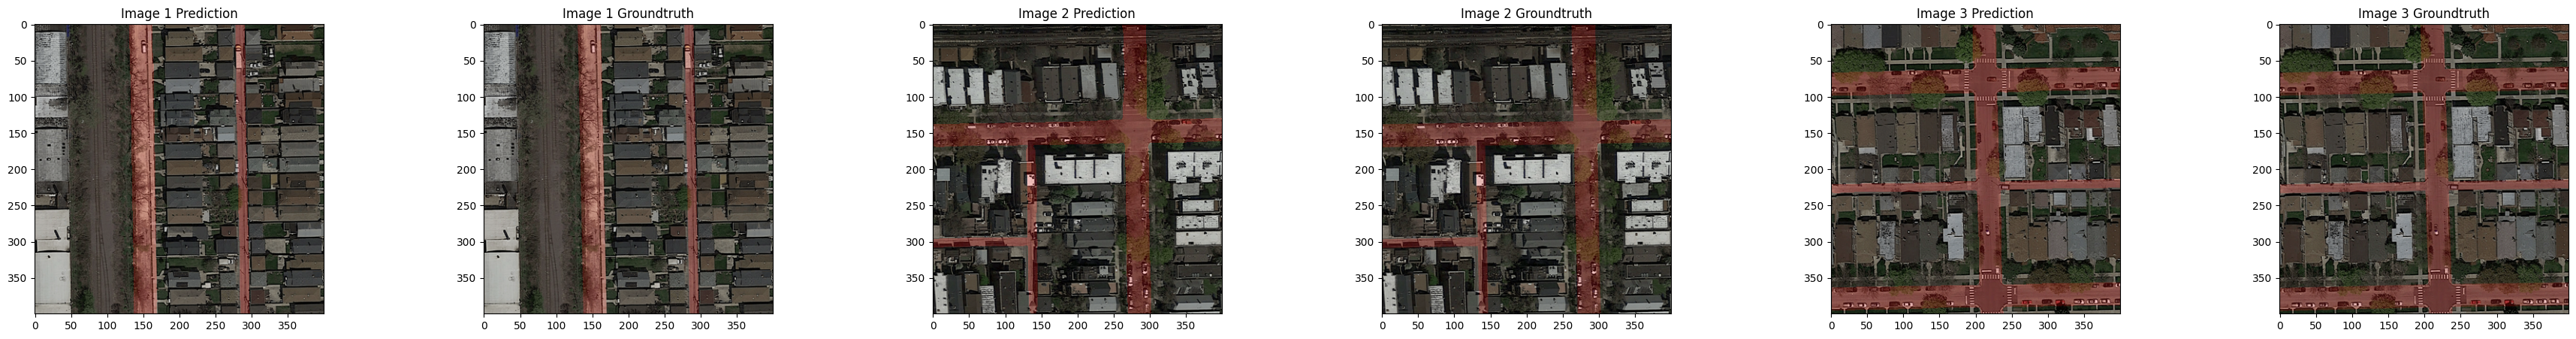

In [ ]:
show_predictions_unet(model32R, 3)

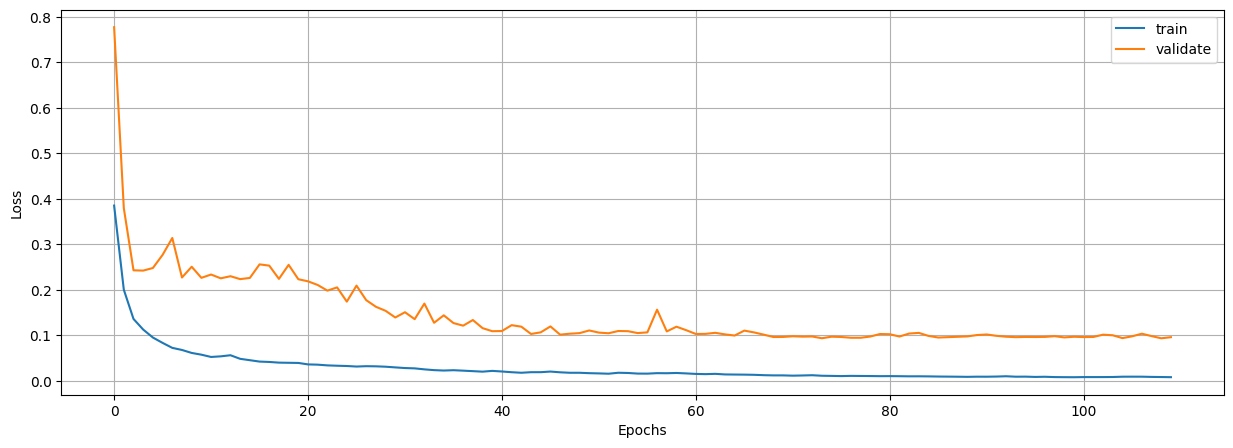

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.plot(history_32R.history['loss'])
plt.plot(history_32R.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validate'], loc='upper right')
#plt.ylim([0, 1.3])
plt.grid()
plt.show()

## **3rd model : U-Net 32NoD**
U-net model with 4 stages starting with a filter of size 32. No regularization and no dropout.



In [ ]:
model32NoD = build_unet(dropout = 0, activation='relu', regularization=0)
model32NoD.compile(optimizer='adam',
                loss=TverskyLoss,
                metrics=['accuracy'])
callbacks_32NoD = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True),
             tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromNoD', save_weights_only=True, verbose=1)]
history_32NoD = model32NoD.fit(x_tr, y_tr, batch_size=8, epochs=200, validation_data=(x_te, y_te), callbacks=[callbacks_32NoD])


Epoch 1/200
11/11 [==============================] - ETA: 0s - loss: 0.3658 - accuracy: 0.6675
Epoch 1: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromNoD
11/11 [==============================] - 13s 304ms/step - loss: 0.3658 - accuracy: 0.6675 - val_loss: 0.7118 - val_accuracy: 0.2877
Epoch 2/200
11/11 [==============================] - ETA: 0s - loss: 0.2223 - accuracy: 0.8127
Epoch 2: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromNoD
11/11 [==============================] - 2s 224ms/step - loss: 0.2223 - accuracy: 0.8127 - val_loss: 0.2666 - val_accuracy: 0.7766
Epoch 3/200
11/11 [==============================] - ETA: 0s - loss: 0.1434 - accuracy: 0.8778
Epoch 3: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/fromNoD
11/11 [==============================] - 2s 190ms/step - loss: 0.1434 - accuracy: 0.8778 - val_loss: 0.2258 - val_accuracy: 0.7762
Epoch 4/200
11/11 [==============================] - E

In [ ]:
train_f1=evaluating_model_f1(x_tr, y_tr, model32NoD)
print("the training f1 score is: ", train_f1)

validate_f1=evaluating_model_f1(x_te, y_te, model32NoD)
print("the validating f1 score is:", validate_f1)

3/3 [==============================] - 1s 128ms/step
the training f1 score is:  0.9876548134115423
1/1 [==============================] - 0s 60ms/step
the validating f1 score is: 0.7695866378912259


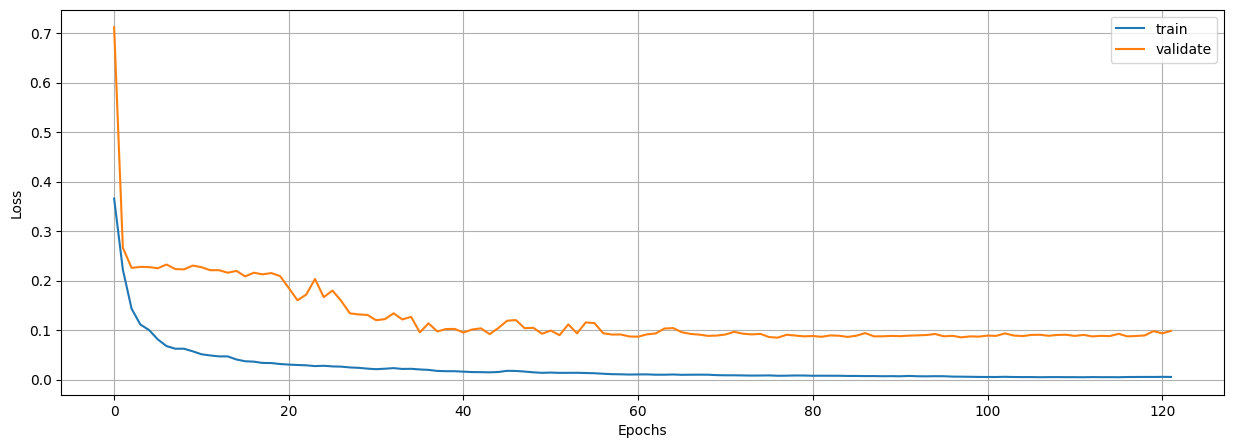

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.plot(history_32NoD.history['loss'])
plt.plot(history_32NoD.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validate'], loc='upper right')
#plt.ylim([0, 1.3])
plt.grid()
plt.show()

## **4th model : U-Net 64**
U-net model with 4 stages starting with a filter of size 64. No regularization and no dropout.

In [ ]:
model64 = build_unet(start_filter=64, num_stages= 4,dropout = 0, activation='relu', regularization=0)
model64.compile(optimizer='adam',
                loss=TverskyLoss,
                metrics=['accuracy'])
callbacks_64 = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True),
             tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from64', save_weights_only=True, verbose=1)]
history_64 = model64.fit(x_tr, y_tr, batch_size=8, epochs=200, validation_data=(x_te, y_te), callbacks=[callbacks_64])


Epoch 1/200
11/11 [==============================] - ETA: 0s - loss: 0.3217 - accuracy: 0.6978
Epoch 1: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from64
11/11 [==============================] - 22s 976ms/step - loss: 0.3217 - accuracy: 0.6978 - val_loss: 0.2679 - val_accuracy: 0.7327
Epoch 2/200
11/11 [==============================] - ETA: 0s - loss: 0.1805 - accuracy: 0.8324
Epoch 2: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from64
11/11 [==============================] - 6s 524ms/step - loss: 0.1805 - accuracy: 0.8324 - val_loss: 0.7018 - val_accuracy: 0.2982
Epoch 3/200
11/11 [==============================] - ETA: 0s - loss: 0.1502 - accuracy: 0.8570
Epoch 3: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from64
11/11 [==============================] - 6s 564ms/step - loss: 0.1502 - accuracy: 0.8570 - val_loss: 0.5864 - val_accuracy: 0.4155
Epoch 4/200
11/11 [==============================] - ETA:

In [ ]:
train_f1=evaluating_model_f1(x_tr, y_tr, model64)
print("the training f1 score is: ", train_f1)

validate_f1=evaluating_model_f1(x_te, y_te, model64)
print("the validating f1 score is:", validate_f1)

3/3 [==============================] - 14s 3s/step
the training f1 score is:  0.9490625462073043
1/1 [==============================] - 4s 4s/step
the validating f1 score is: 0.7577615134032647


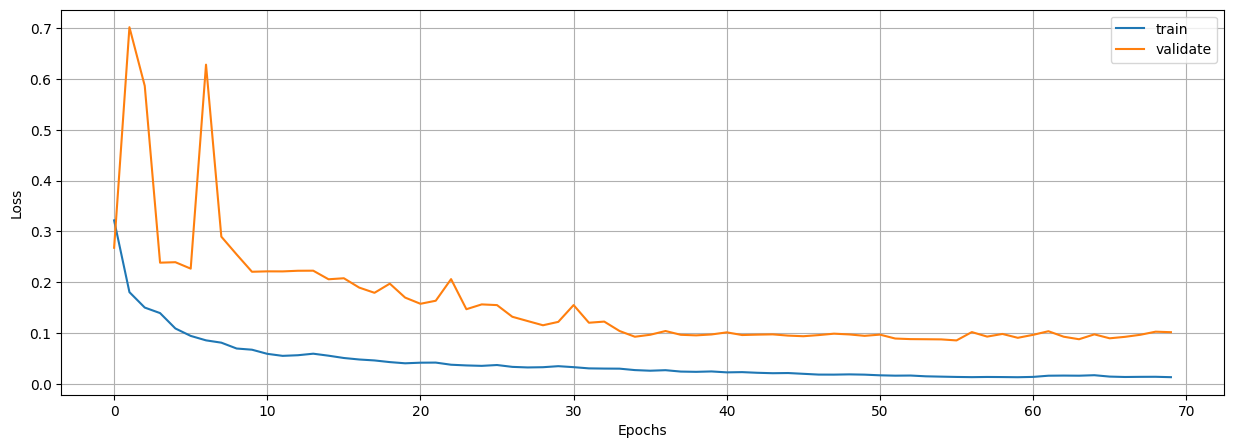

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(history_64.history['loss'])
plt.plot(history_64.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validate'], loc='upper right')
#plt.ylim([0, 1.3])
plt.grid()
plt.show()

## **5th model : U-Net 64RD**
U-net model with 4 stages starting with a filter of size 64. With L2.regularization and 0.1 dropout.



In [ ]:
model64RD = build_unet(start_filter=64, num_stages= 4,dropout = 0.1, activation='relu', regularization=1e-8)
model64RD.compile(optimizer='adam',
                loss=TverskyLoss,
                metrics=['accuracy'])
callbacks_64RD = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True),
             tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from64RD', save_weights_only=True, verbose=1)]
history_64RD = model64RD.fit(x_tr, y_tr, batch_size=8, epochs=200, validation_data=(x_te, y_te), callbacks=[callbacks_64RD])

Epoch 1/200
11/11 [==============================] - ETA: 0s - loss: 0.3179 - accuracy: 0.7052
Epoch 1: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from64RD
11/11 [==============================] - 22s 1s/step - loss: 0.3179 - accuracy: 0.7052 - val_loss: 0.7750 - val_accuracy: 0.2253
Epoch 2/200
11/11 [==============================] - ETA: 0s - loss: 0.1617 - accuracy: 0.8495
Epoch 2: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from64RD
11/11 [==============================] - 10s 996ms/step - loss: 0.1617 - accuracy: 0.8495 - val_loss: 0.4412 - val_accuracy: 0.6128
Epoch 3/200
11/11 [==============================] - ETA: 0s - loss: 0.1275 - accuracy: 0.8785
Epoch 3: saving model to /content/drive/Shareddrives/ML_PROJET2/Project_2/Models/from64RD
11/11 [==============================] - 11s 1s/step - loss: 0.1275 - accuracy: 0.8785 - val_loss: 0.4014 - val_accuracy: 0.5999
Epoch 4/200
11/11 [==============================] - ET

In [ ]:
train_f1=evaluating_model_f1(x_tr, y_tr, model64RD)
print("the training f1 score is: ", train_f1)

validate_f1=evaluating_model_f1(x_te, y_te, model64RD)
print("the validating f1 score is:", validate_f1)

3/3 [==============================] - 1s 343ms/step
the training f1 score is:  0.9851316272529701
1/1 [==============================] - 0s 33ms/step
the validating f1 score is: 0.7683319308027828


1/1 [==============================] - 0s 79ms/step


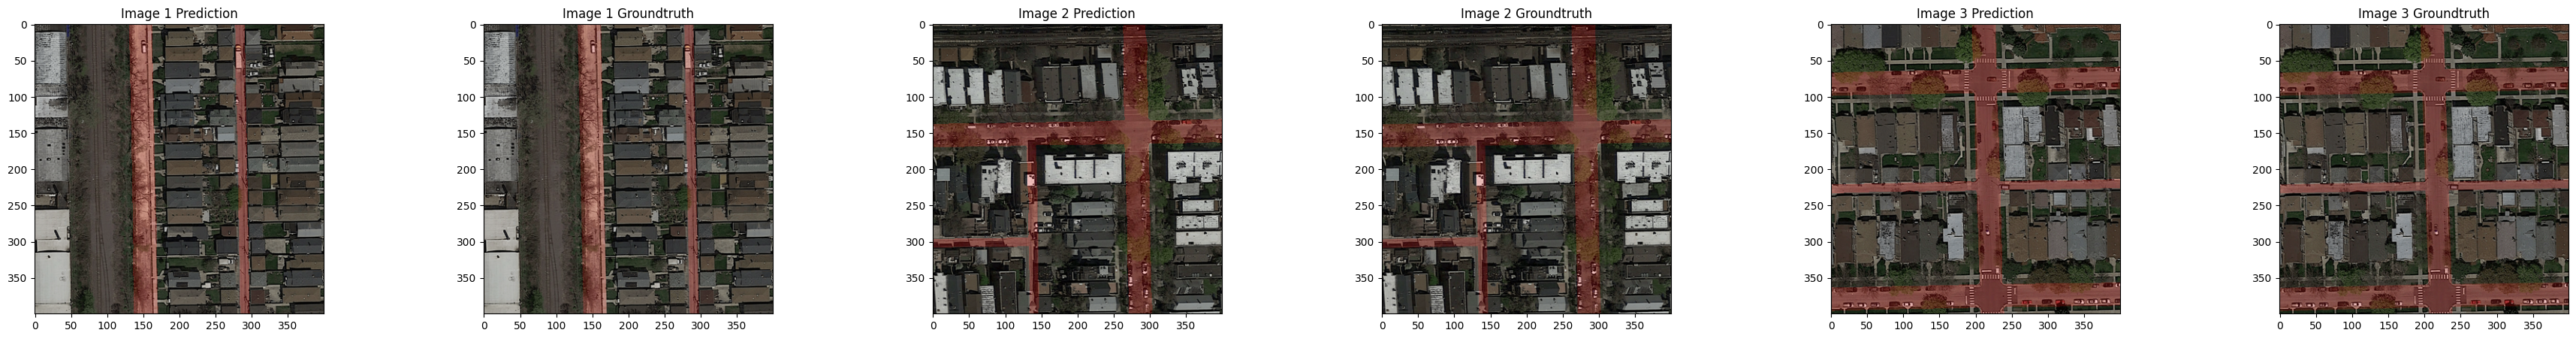

In [ ]:
show_predictions_unet(model64RD, 3)

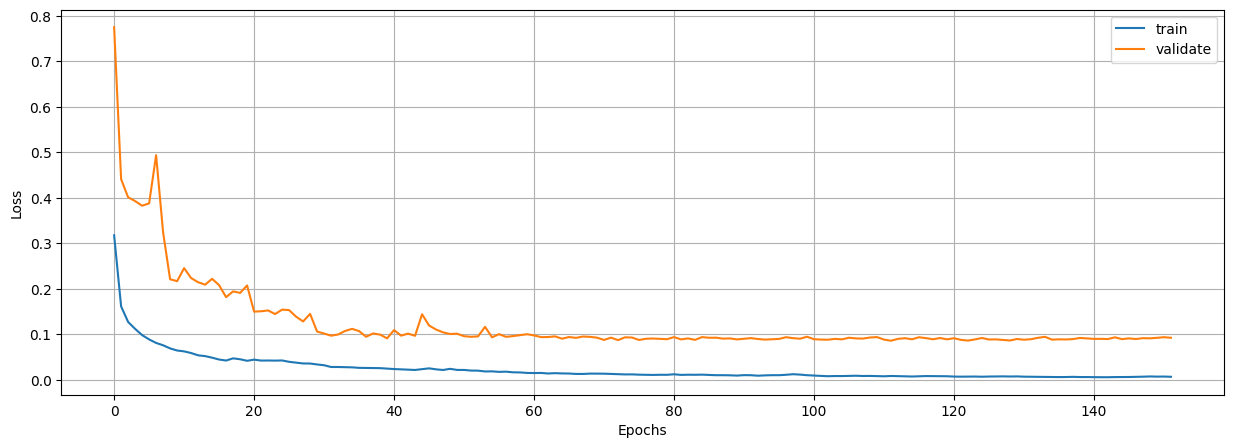

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(history_64RD.history['loss'])
plt.plot(history_64RD.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validate'], loc='upper right')
#plt.ylim([0, 1.3])
plt.grid()
plt.show()